PyGaze Analysis

In [36]:
# We load the original results from the file data/4/processed-data/fixationsAll.csv

import pandas as pd

# We load the original results from the file data/4/processed-data/fixationsAll.csv
fixationsAll = pd.read_csv('results/original_data_4.csv')

# We only keep the columns Subject, Sex, Age, Image, CategoryName, list_size, Likert_list_size, working_size, Likert_working_size, total_size, Likert_total_size and StimulusType
fixationsAll = fixationsAll[['Subject', 'Sex', 'Age', 'Image', 'CategoryName', 'list_size', 'Likert_list_size', 'working_size', 'Likert_working_size', 'total_size', 'Likert_total_size', 
'StimulusType']]
fixationsAll['Subject'] = fixationsAll['Subject'].astype("string")
fixationsAll['Image'] = fixationsAll['Image'].astype('int32')

# We load the PyGazeAnalyzer results from the file results/pygaze_fixations_4.csv
pygaze_fixations = pd.read_csv('results/pygaze_fixations_4.csv')
# We add a 'S' before each subject number
pygaze_fixations['Participant'] = 'S' + pygaze_fixations['Participant'].astype(str)
# We remove the '.BMP' from the Task column and cast them to int32
pygaze_fixations['Task'] = pygaze_fixations['Task'].str.replace('.BMP', '')
pygaze_fixations['Task'] = pygaze_fixations['Task'].astype("int32")

# We combine the two dataframes into one by combining the columns where the values of Participant and Task are the same
results_pygaze = pd.merge(fixationsAll, pygaze_fixations, how='inner', left_on=['Subject', 'Image'], right_on=['Participant', 'Task'])
results_pygaze


C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2936749557.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  pygaze_fixations['Task'] = pygaze_fixations['Task'].str.replace('.BMP', '')


,Subject,Sex,Age,Image,CategoryName,list_size,Likert_list_size,working_size,Likert_working_size,total_size,Likert_total_size,StimulusType,Participant,Task,Fixation Count,Total Fixation Duration [ms],Average Fixation Duration [ms]
0,S151,M,21.0,8,List,6.5,1,16.0,4.0,12.0,1.0,ainsert,S151,8,33,2436.1,73.821212
1,S151,M,21.0,25,List,13.0,3,6.0,1.0,13.0,1.0,ainsert,S151,25,38,4037.3,106.244737
2,S151,M,21.0,28,List,14.0,3,8.0,2.0,14.0,2.0,ainsert,S151,28,69,6723.4,97.440580
3,S151,M,21.0,21,List,14.0,3,10.0,2.0,14.0,2.0,ainsert,S151,21,25,3620.5,144.820000
4,S151,M,21.0,11,List,17.0,4,13.0,3.0,17.0,3.0,ainsert,S151,11,36,4988.3,138.563889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,S204,M,24.0,43,Tree,9.0,2,9.0,3.0,1.0,2.0,traversal,S204,43,48,4237.7,88.285417
2591,S204,M,24.0,49,Tree,9.0,2,9.0,3.0,1.0,2.0,traversal,S204,49,39,4738.2,121.492308
2592,S204,M,24.0,40,Tree,12.0,2,12.0,3.0,12.0,2.0,traversal,S204,40,78,7107.6,91.123077
2593,S204,M,24.0,55,Tree,13.0,2,13.0,3.0,13.0,2.0,traversal,S204,55,46,5105.2,110.982609


In [37]:
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

def show_results1(results):
	# We calculate the mean and the standard deviation of the fixation count for each CategoryName
	results_mean = results.groupby(['CategoryName']).mean(numeric_only=True)[["Fixation Count", "Total Fixation Duration [ms]"]]
	results_std = results.groupby(['CategoryName']).std(numeric_only=True)[["Fixation Count", "Total Fixation Duration [ms]"]]

	# Apply Pairwise Comparisons Using Non-Parametric Wilcox Tests (α = 0.05)
	# TODO: check if there is a way to use wilcox 

	stat_list_vs_mental_fix_count, p_list_vs_mental_fix_count = mannwhitneyu(results[results['CategoryName'] == "List"]['Fixation Count'], results[results['CategoryName'] == "Mental"]['Fixation Count'])

	# Use mannwhitneyu for the other comparison
	stat_tree_vs_mental_fix_count, p_tree_vs_mental_fix_count = mannwhitneyu(results[results['CategoryName'] == "Tree"]['Fixation Count'], results[results['CategoryName'] == "Mental"]['Fixation Count'])

	stat_list_vs_mental_fix_time, p_list_vs_mental_fix_time = mannwhitneyu(results[results['CategoryName'] == "List"]['Total Fixation Duration [ms]'], results[results['CategoryName'] == "Mental"]['Total Fixation Duration [ms]'])

	# Use mannwhitneyu for the other comparison
	stat_tree_vs_mental_fix_time, p_tree_vs_mental_fix_time = mannwhitneyu(results[results['CategoryName'] == "Tree"]['Total Fixation Duration [ms]'], results[results['CategoryName'] == "Mental"]['Total Fixation Duration [ms]'])

	# We create a table to show the results

	# We divide the fixation time by 1000 to get the fixation time in seconds
	results_mean['Total Fixation Duration [ms]'] = results_mean['Total Fixation Duration [ms]']/1000
	results_std['Total Fixation Duration [ms]'] = results_std['Total Fixation Duration [ms]']/1000

	data = [

		[
			'Fixation Time (s)', 
			f"{'%.2f' % results_mean.loc['List']['Total Fixation Duration [ms]']}({'%.2f' % results_std.loc['List']['Total Fixation Duration [ms]']})",
			f"{'%.2f' % results_mean.loc['Mental']['Total Fixation Duration [ms]']}({'%.2f' % results_std.loc['Mental']['Total Fixation Duration [ms]']})",
			f"{'%.2f' % results_mean.loc['Tree']['Total Fixation Duration [ms]']}({'%.2f' % results_std.loc['Tree']['Total Fixation Duration [ms]']})",
			'%.3f' % p_list_vs_mental_fix_time,
			'%.3f' % p_tree_vs_mental_fix_time
		],
		[
			'Fixation Count', 
			f"{'%.0f' % results_mean.loc['List']['Fixation Count']} ({'%.0f' % results_std.loc['List']['Fixation Count']})", 
			f"{'%.0f' % results_mean.loc['Mental']['Fixation Count']} ({'%.0f' % results_std.loc['Mental']['Fixation Count']})", 
			f"{'%.0f' % results_mean.loc['Tree']['Fixation Count']} ({'%.0f' % results_std.loc['Tree']['Fixation Count']})", 
			'%.3f' % p_list_vs_mental_fix_count, 
			'%.3f' % p_tree_vs_mental_fix_count
		]

		
	]
	data_df = pd.DataFrame(data)
	data_df.columns = ['', 'List', 'Mental', 'Tree', 'List vs Mental p', 'Tree vs Mental p']
	return data_df



In [38]:

from pandas import Interval

def show_results2(results):

	results_std = results[["Sex", "Age", "Fixation Count", "Average Fixation Duration [ms]"]].std(numeric_only=True)

	# Group the results by the different values of Sex
	results_sex = results.groupby("Sex")[["Fixation Count", "Average Fixation Duration [ms]"]]
	results_sex_mean = results_sex.mean(numeric_only=True)
	results_sex_std = results_sex.std(numeric_only=True)

	# Group the results by ages between 18-22 and 23-27
	results_age = results.groupby(pd.cut(results["Age"], [18, 22, 27]))[["Fixation Count", "Average Fixation Duration [ms]"]]
	results_age_mean = results_age.mean(numeric_only=True)
	results_age_std = results_age.std(numeric_only=True)

	# Perform non-parametric Wilcoxon tests (α =0.05) 
	stat_gender_fix_count, p_gender_fix_count = mannwhitneyu(results[results['Sex'] == "M"]['Fixation Count'], results[results['Sex'] == "F"]['Fixation Count'])
	stat_gender_fix_time, p_gender_fix_time = mannwhitneyu(results[results['Sex'] == "M"]['Average Fixation Duration [ms]'], results[results['Sex'] == "F"]['Average Fixation Duration [ms]'])

	stat_age_fix_count, p_age_fix_count = mannwhitneyu(results[results['Age'] <= 22]['Fixation Count'], results[results['Age'] > 22]['Fixation Count'])
	stat_age_fix_time, p_age_fix_time = mannwhitneyu(results[results['Age'] <= 22]['Average Fixation Duration [ms]'], results[results['Age'] > 22]['Average Fixation Duration [ms]'])

	# We create a table to show the results
	data = [
		[
			'Avg. Fix. Duration (ms)', 
			f"{'%.2f' % results_sex_mean.loc['M']['Average Fixation Duration [ms]']}({'%.2f' % results_sex_std.loc['M']['Average Fixation Duration [ms]']})",
			f"{'%.2f' % results_sex_mean.loc['F']['Average Fixation Duration [ms]']}({'%.2f' % results_sex_std.loc['F']['Average Fixation Duration [ms]']})",
			f"{'%.2f' % results_age_mean.loc[Interval(18, 22)]['Average Fixation Duration [ms]']}({'%.2f' % results_age_std.loc[Interval(18, 22)]['Average Fixation Duration [ms]']})",
			f"{'%.2f' % results_age_mean.loc[Interval(22, 27)]['Average Fixation Duration [ms]']}({'%.2f' % results_age_std.loc[Interval(22, 27)]['Average Fixation Duration [ms]']})",
			'%.3f' % p_gender_fix_time,
			'%.3f' % p_age_fix_time
		],
		[
			'Fixation Count', 
			f"{'%.0f' % results_sex_mean.loc['M']['Fixation Count']} ({'%.0f' % results_sex_std.loc['M']['Fixation Count']})", 
			f"{'%.0f' % results_sex_mean.loc['F']['Fixation Count']} ({'%.0f' % results_sex_std.loc['F']['Fixation Count']})", 
			f"{'%.0f' % results_age_mean.loc[Interval(18, 22)]['Fixation Count']} ({'%.0f' % results_age_std.loc[Interval(18, 22)]['Fixation Count']})", 
			f"{'%.0f' % results_age_mean.loc[Interval(22, 27)]['Fixation Count']} ({'%.0f' % results_age_std.loc[Interval(22, 27)]['Fixation Count']})", 
			'%.3f' % p_gender_fix_count, 
			'%.3f' % p_age_fix_count
		]
	]

	data_df = pd.DataFrame(data)
	data_df.columns = ['', 'Men', 'Women', '18-22', '23-27', 'Gender p', 'Age p']
	return data_df



PyGaze vs Ogama

In [39]:
# Function to make the file compatible with Ogama
import pandas as pd

# We load the original data from the file data/4/formatted-raw-data/151/ogama.txt
data = pd.read_csv('data/4/formatted-raw-data/153/ogama.txt', sep=',', skiprows=0, encoding='utf-16')

# Change the values of the ImageName column to remove the last 4 characters
data[' ImageName'] = data[' ImageName'].str[:-4]

# We remove all rows where Included? is "N"
data = data[data[' Included?'] == "Y"]

# Save it again as ogama2.csv
data.to_csv('data/4/formatted-raw-data/153/changed.csv', index=False)

Original Results of the Study

In [40]:
# Load the original data from the file results/original_data_4.csv
fixationsAll = pd.read_csv('results/original_data_4.csv')

# Look at only the data from the subject S153
fixationsAll = fixationsAll[fixationsAll['Subject'] == 'S153']

# Only keep the columns TrialID, FixationCount, AvgFixDuration and TotalFixationTime
fixationsAll = fixationsAll[['Image', 'FixationsCount', 'TotalFixationTime', 'AvgFixDuration']]
fixationsAll['FixationsCount'] = fixationsAll['FixationsCount'].astype('int32')
# Rename to Total Fixation Count, Total Fixation Duration and Average Fixation Duration
fixationsAll.columns = ['TrialID', 'Total Fixation Count', 'Total Fixation Duration', 'Average Fixation Duration']
#Sort by TrialID
fixationsAll = fixationsAll.sort_values(by=['TrialID'])
#fixationsAll = fixationsAll.style.hide()



Import data automatically into Ogama by manipulating the database 

In [11]:
import pandas as pd
import os
import sqlite3
import numpy as np
# Need to register numpy types to be able to save them in the database, as SQL only supports int8
sqlite3.register_adapter(np.int64, lambda val: int(val))
sqlite3.register_adapter(np.int32, lambda val: int(val))

# Path to database
database_path = 'G:\\Dokumente\\OgamaExperiments\\Experiment4_1\\Database\\Experiment4_1.db'

def import_data_into_ogama(path, subject):

	# We load the original data from the file data/4/formatted-raw-data/151/ogama.txt
	data = pd.read_csv(path, sep=',', skiprows=0, encoding='utf-16')

	# Change the values of the ImageName column to remove the last 4 characters
	data[' ImageName'] = data[' ImageName'].str[:-4]

	# We remove all rows where Included? is "N"
	data = data[data[' Included?'] == "Y"]

	# Normalize time
	data[' StartTime'] = data[' StartTime'] - data[' StartTime'].min()
	# Time as integer
	data[' StartTime'] = data[' StartTime'].astype('int32')

	# Connect to database
	conn = sqlite3.connect(database_path)
	c = conn.cursor()

	# Add a table for the subject called Subject + 'RawData'
	c.execute("CREATE TABLE IF NOT EXISTS ["+ subject +"Rawdata] ([ID] integer PRIMARY KEY AUTOINCREMENT NOT NULL,[SubjectName] varchar(50) NOT NULL COLLATE NOCASE, [TrialSequence] integer NOT NULL, [Time] integer NOT NULL, [PupilDiaX] float, [PupilDiaY] float, [GazePosX] float, [GazePosY] float, [MousePosX] float, [MousePosY] float, [EventID] integer)")

	# Add data in the following scheme:
		# SubjectName = subject
		# TrialSequence = ' ImageName'
		# Time = ' StartTime'
		# GazePosX = ' X'
		# GazePosY = ' Y'
	
	# For each row in the dataframe
	for index, row in data.iterrows():
		# Insert the data into the table
		c.execute("INSERT INTO ["+ subject +"Rawdata] (SubjectName, TrialSequence, Time, GazePosX, GazePosY) VALUES (?, ?, ?, ?, ?)", (subject, row[' ImageName'], row[' StartTime'], row[' X'], row[' Y']))

	# Add subject to the Subjects table
	c.execute("INSERT INTO Subjects (SubjectName) VALUES (?)", (subject,))

	# Add each grouped trial to the Trials table
	for trial in data.groupby(' ImageName'):
		trialstarttime = trial[1][' StartTime'].min()
		# Max Starttime + last duration as integer
		trialduration = trial[1][' StartTime'].max() - trial[1][' StartTime'].min() + trial[1][' Duration'].iloc[-1]
		trialduration = int(trialduration)
		c.execute("INSERT INTO Trials (SubjectName, TrialID, TrialName, TrialSequence, Category,  TrialStartTime, Duration) VALUES (?, ?, ?, ?, ?, ?, ?)", (subject, trial[0], trial[0], trial[0], "",trialstarttime, trialduration))

	# Save the database
	conn.commit()

def drop_all_subject_tables():
	# Connect to database
	import sqlite3
	conn = sqlite3.connect(database_path)
	c = conn.cursor()

	for i in range(151, 205):
		# Drop the table named S + str(i) + "RawData"
		c.execute("DROP TABLE IF EXISTS S" + str(i) + "Rawdata")

	# Delete entries from Trials
	c.execute("DELETE FROM Trials")

	# Delete entries from Subjects
	c.execute("DELETE FROM Subjects")

	# Save the database
	conn.commit()

drop_all_subject_tables()

for i in range(151, 205):
	# If the folder i exists
	path = 'data/4/formatted-raw-data/' + str(i)
	if os.path.isdir(path):
		# Import the data into the database
		import_data_into_ogama(path + '/ogama.txt', 'S' + str(i))
		print('Imported data for subject S' + str(i))

Imported data for subject S151
Imported data for subject S152
Imported data for subject S153
Imported data for subject S154
Imported data for subject S155
Imported data for subject S156
Imported data for subject S157
Imported data for subject S159
Imported data for subject S160
Imported data for subject S161
Imported data for subject S162
Imported data for subject S163
Imported data for subject S165
Imported data for subject S167
Imported data for subject S168
Imported data for subject S169
Imported data for subject S171
Imported data for subject S172
Imported data for subject S173
Imported data for subject S174
Imported data for subject S175
Imported data for subject S176
Imported data for subject S177
Imported data for subject S179
Imported data for subject S182
Imported data for subject S183
Imported data for subject S200
Imported data for subject S201
Imported data for subject S202
Imported data for subject S203
Imported data for subject S204


Import the fixations from the database and calculate our results

In [31]:
import pandas as pd

# Path to database
database_path = 'G:\\Dokumente\\OgamaExperiments\\Experiment4_1\\Database\\Experiment4_1.db'

total_results = pd.DataFrame()

def calculate_results_for_subject(subject):
	# Connect to database
	import sqlite3
	conn = sqlite3.connect(database_path)
	c = conn.cursor()

	# Export all fixations for the subject
	c.execute("SELECT * FROM GazeFixations WHERE SubjectName = ?", (subject,))
	fixations = c.fetchall()

	# Save it into a dataframe
	fixations_df = pd.DataFrame(fixations)

	# Set the column names of the dataframe
	fixations_df.columns = ['ID', 'SubjectName', 'TrialID', 'TrialSequence', 'CountInTrial', 'StartTime', 'Length', 'PosX', 'PosY']

	# For each TrialID, we calculate the total fixation count, fixation duration and average fixation duration
	results = pd.DataFrame()
	results['Total Fixation Count'] = fixations_df.groupby('TrialID')['ID'].count()
	results['Total Fixation Duration'] = fixations_df.groupby('TrialID')['Length'].sum()
	results['Average Fixation Duration'] = fixations_df.groupby('TrialID')['Length'].mean()
	results['Subject'] = subject


	return results

	


for i in range(151, 205):
	# If the folder i exists
	path = 'data/4/formatted-raw-data/' + str(i)
	if os.path.isdir(path):
		# Append to the total_results dataframe
		total_results = total_results.append(calculate_results_for_subject('S' + str(i)))



# We load the original results from the file data/4/processed-data/fixationsAll.csv
fixationsAll = pd.read_csv('results/original_data_4.csv')

# We only keep the columns Subject, Sex, Age, Image, CategoryName, list_size, Likert_list_size, working_size, Likert_working_size, total_size, Likert_total_size and StimulusType
fixationsAll = fixationsAll[['Subject', 'Sex', 'Age', 'Image', 'CategoryName', 'list_size', 'Likert_list_size', 'working_size', 'Likert_working_size', 'total_size', 'Likert_total_size', 
'StimulusType']]
fixationsAll['Subject'] = fixationsAll['Subject'].astype("string")
fixationsAll['Image'] = fixationsAll['Image'].astype('int32')


# We combine the two dataframes into one by combining the columns where the values of Participant and Task are the same
results_ogama = pd.merge(fixationsAll, total_results, how='inner', left_on=['Subject', 'Image'], right_on=['Subject', 'TrialID'])
# Rename the columns Fixation Count, Total Fixation Duration and Average Fixation Duration
results_ogama = results_ogama.rename(columns={'Total Fixation Count': 'Fixation Count', 'Total Fixation Duration': 'Total Fixation Duration [ms]', 'Average Fixation Duration': 'Average Fixation Duration [ms]'})

results_ogama


C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_results = total_results.append(calculate_results_for_subject('S' + str(i)))
C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_results = total_results.append(calculate_results_for_subject('S' + str(i)))
C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_results = total_results.append(calculate_results_for_subject('S' + str(i)))
C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from

         Total Fixation Count  Total Fixation Duration  \
TrialID                                                  
1                          15                    32064   
2                           3                    15081   
3                          41                     7529   
4                          34                     4903   
5                          28                     4256   
...                       ...                      ...   
86                         20                     4073   
87                         13                     2852   
88                         19                     3919   
89                         13                     3137   
90                         22                     3624   

         Average Fixation Duration Subject  
TrialID                                     
1                      2137.600000    S151  
2                      5027.000000    S151  
3                       183.634146    S151  
4                   

C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_results = total_results.append(calculate_results_for_subject('S' + str(i)))
C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_results = total_results.append(calculate_results_for_subject('S' + str(i)))
C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_results = total_results.append(calculate_results_for_subject('S' + str(i)))
C:\Users\Timon\AppData\Local\Temp\ipykernel_31012\2918974397.py:42: FutureWarning: The frame.append method is deprecated and will be removed from

,Subject,Sex,Age,Image,CategoryName,list_size,Likert_list_size,working_size,Likert_working_size,total_size,Likert_total_size,StimulusType,Fixation Count,Total Fixation Duration [ms],Average Fixation Duration [ms]
0,S151,M,21.0,8,List,6.5,1,16.0,4.0,12.0,1.0,ainsert,34,4935,145.147059
1,S151,M,21.0,25,List,13.0,3,6.0,1.0,13.0,1.0,ainsert,26,5420,208.461538
2,S151,M,21.0,28,List,14.0,3,8.0,2.0,14.0,2.0,ainsert,59,8875,150.423729
3,S151,M,21.0,21,List,14.0,3,10.0,2.0,14.0,2.0,ainsert,25,6108,244.320000
4,S151,M,21.0,11,List,17.0,4,13.0,3.0,17.0,3.0,ainsert,19,7090,373.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,S204,M,24.0,43,Tree,9.0,2,9.0,3.0,1.0,2.0,traversal,35,6842,195.485714
2548,S204,M,24.0,49,Tree,9.0,2,9.0,3.0,1.0,2.0,traversal,25,6325,253.000000
2549,S204,M,24.0,40,Tree,12.0,2,12.0,3.0,12.0,2.0,traversal,57,9891,173.526316
2550,S204,M,24.0,55,Tree,13.0,2,13.0,3.0,13.0,2.0,traversal,38,7056,185.684211


In [41]:
data_df = show_results1(results_pygaze)
data_df

,,List,Mental,Tree,List vs Mental p,Tree vs Mental p
0,Fixation Time (s),6.30(5.39),2.57(2.90),6.11(10.43),0.000,0.000
1,Fixation Count,49 (34),21 (19),46 (30),0.000,0.000


In [42]:
data_df = show_results1(results_ogama)
data_df

,,List,Mental,Tree,List vs Mental p,Tree vs Mental p
0,Fixation Time (s),8.89(6.08),3.68(3.54),8.44(10.74),0.000,0.000
1,Fixation Count,42 (27),18 (15),39 (24),0.000,0.000


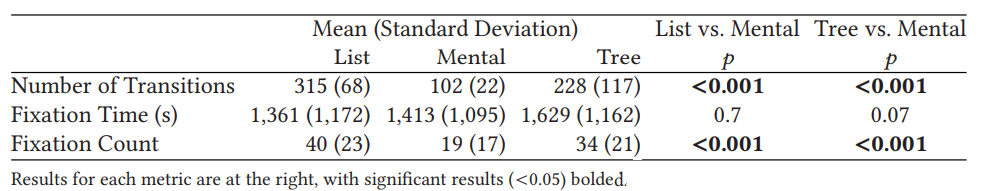

In [43]:
data_df = show_results2(results_pygaze)
data_df

,,Men,Women,18-22,23-27,Gender p,Age p
0,Avg. Fix. Duration (ms),106.46(62.30),131.38(91.41),113.91(65.61),123.76(91.83),0.000,0.002
1,Fixation Count,35 (29),40 (29),38 (29),38 (30),0.000,0.249


In [35]:
data_df = show_results2(results_ogama)
data_df

,,Men,Women,18-22,23-27,Gender p,Age p
0,Avg. Fix. Duration (ms),255.68(455.57),283.84(450.24),252.95(410.60),289.12(529.45),0.006,0.129
1,Fixation Count,31 (24),34 (24),32 (23),32 (25),0.001,0.888


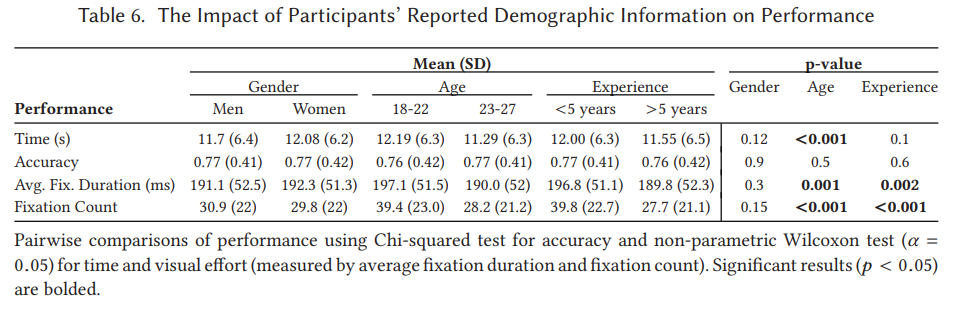